## Predicting H1N1 Flu Vaccination Status

## Overview

As the world struggles to vaccinate the global population against COVID-19, an understanding of how people’s backgrounds, opinions, and health behaviors are related to their personal vaccination patterns can provide guidance for future public health efforts. Such findings can guide policymakers and public health professionals develop public health efforts to improve vaccine uptake to mitigate spread of preventable communicable dieases.

This project utilises data from a United States' conducted National 2009 H1N1 Flu Survey to predict whether someone  revieved H1N1 flu vaccines. Gaining deeper insights into how these attributes correlate with individual vaccination behaviors can offer valuable direction for upcoming public health initiatives.

## Business Understanding

The National 2009 H1N1 Flu Survey data was downloaded from DrivenData and the purpose of this project is to use data to forecast whether or not a person received the H1N1 flu vaccination, using features such as social, economic, and demographic background, opinions on risks of illness and vaccine effectiveness, and behaviors towards mitigating transmission, etcetera. The findings would also be applicable for use by the Kenya's Ministry of Health to more effectively target public health initiatives that boost vaccination rates and localise for other communicable dieases like influenza.




## Objectives
1. Our objective is to develop a predictive model to identify individuals who are likely to exhibit vaccine hesitancy. Our goal is to provide insights that can inform targeted vaccination campaigns and interventions aimed at addressing vaccine hesitancy and increasing vaccine uptake rates.
2. Identify common factors associated with increased uptake of vaccines. Understanding these factors can inform the development of targeted interventions and public health strategies aimed at promoting vaccination uptake and improving overall immunization rates 
3. Examine the influence of socio-economic factors, such as income and education, on vaccination decisions

## Data Description
- h1n1_concern - Level of concern about the H1N1 flu.
 - 0 = Not at all concerned; 1 = Not very concerned; 2 = Somewhat concerned; 3 = Very concerned.
- h1n1_knowledge - Level of knowledge about H1N1 flu.
 - 0 = No knowledge; 1 = A little knowledge; 2 = A lot of knowledge.
- behavioral_antiviral_meds - Has taken antiviral medications. (binary)
- behavioral_avoidance - Has avoided close contact with others with flu-like symptoms. (binary)
- behavioral_face_mask - Has bought a face mask. (binary)
- behavioral_wash_hands - Has frequently washed hands or used hand sanitizer. (binary)
- behavioral_large_gatherings - Has reduced time at large gatherings. (binary)
- behavioral_outside_home - Has reduced contact with people outside of own household. (binary)
- behavioral_touch_face - Has avoided touching eyes, nose, or mouth. (binary)
- doctor_recc_h1n1 - H1N1 flu vaccine was recommended by doctor. (binary)
- doctor_recc_seasonal - Seasonal flu vaccine was recommended by doctor. (binary)
- chronic_med_condition - Has any of the following chronic medical conditions: asthma or an other lung condition, diabetes, a heart condition, a kidney condition, sickle cell anemia or other anemia, a neurological or neuromuscular condition, a liver condition, or a weakened immune system caused by a chronic illness or by medicines taken for a chronic illness. (binary)
- child_under_6_months - Has regular close contact with a child under the age of six months. (binary)
- health_worker - Is a healthcare worker. (binary)
- health_insurance - Has health insurance. (binary)
- opinion_h1n1_vacc_effective - Respondent's opinion about H1N1 vaccine effectiveness.
 - 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_h1n1_risk - Respondent's opinion about risk of getting sick with H1N1 flu without vaccine.
 - 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_h1n1_sick_from_vacc - Respondent's worry of getting sick from taking H1N1 vaccine.
 - 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- opinion_seas_vacc_effective - Respondent's opinion about seasonal flu vaccine effectiveness.
 - 1 = Not at all effective; 2 = Not very effective; 3 = Don't know; 4 = Somewhat effective; 5 = Very effective.
- opinion_seas_risk - Respondent's opinion about risk of getting sick with seasonal flu without vaccine.
 - 1 = Very Low; 2 = Somewhat low; 3 = Don't know; 4 = Somewhat high; 5 = Very high.
- opinion_seas_sick_from_vacc - Respondent's worry of getting sick from taking seasonal flu vaccine.
 - 1 = Not at all worried; 2 = Not very worried; 3 = Don't know; 4 = Somewhat worried; 5 = Very worried.
- age_group - Age group of respondent.
- education - Self-reported education level.
- race - Race of respondent.
- sex - Sex of respondent.
- income_poverty - Household annual income of respondent with respect to 2008 Census poverty thresholds.
- marital_status - Marital status of respondent.
- rent_or_own - Housing situation of respondent.
- employment_status - Employment status of respondent.
- hhs_geo_region - Respondent's residence using a 10-region geographic classification defined by the U.S. Dept. of Health and Human Services. Values are represented as short random character strings.
- census_msa - Respondent's residence within metropolitan statistical areas (MSA) as defined by the U.S. Census.
- household_adults - Number of other adults in household, top-coded to 3.
- household_children - Number of children in household, top-coded to 3.
- employment_industry - Type of industry respondent is employed in. Values are represented as short random character strings.
- employment_occupation - Type of occupation of respondent. Values are represented as short random character strings.resented as short random character strings.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')

## Load Data

In [2]:
# Loading data [original data from 'DrivenData' was seperated into training and testing sets]
train_features_df = pd.read_csv("Data/training_set_features.csv", index_col="respondent_id")

train_labels_df = pd.read_csv("Data/training_set_labels.csv",index_col="respondent_id")

test_validation_df = pd.read_csv("Data/test_set_features.csv",index_col="respondent_id")

In [3]:
# check first 5 rows of features_df
train_features_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
# check first 5 rows of labels_df
train_labels_df.head()

,h1n1_vaccine,seasonal_vaccine
respondent_id,,
0,0,0
1,0,1
2,0,0
3,0,1
4,0,0


In [5]:
# check first 5 rows of test_validation_df
test_validation_df.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
respondent_id,,,,,,,,,,,,,,,,,,,,,
26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [6]:
# Double-check that the rows between the features and the labels match up
np.testing.assert_array_equal(train_features_df.index.values, train_labels_df.index.values)

In [7]:
## Merge the features and labels data
merged_df = pd.concat([train_features_df, train_labels_df], axis =1)
merged_df

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
respondent_id,,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,Own,Not in Labor Force,qufhixun,Non-MSA,0.0,0.0,NaN,NaN,0,0
26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,Rent,Employed,lzgpxyit,"MSA, Principle City",1.0,0.0,fcxhlnwr,cmhcxjea,0,0
26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,Own,NaN,lzgpxyit,"MSA, Not Principle City",0.0,0.0,NaN,NaN,0,1


In [8]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26707 entries, 0 to 26706
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   h1n1_concern                 26615 non-null  float64
 1   h1n1_knowledge               26591 non-null  float64
 2   behavioral_antiviral_meds    26636 non-null  float64
 3   behavioral_avoidance         26499 non-null  float64
 4   behavioral_face_mask         26688 non-null  float64
 5   behavioral_wash_hands        26665 non-null  float64
 6   behavioral_large_gatherings  26620 non-null  float64
 7   behavioral_outside_home      26625 non-null  float64
 8   behavioral_touch_face        26579 non-null  float64
 9   doctor_recc_h1n1             24547 non-null  float64
 10  doctor_recc_seasonal         24547 non-null  float64
 11  chronic_med_condition        25736 non-null  float64
 12  child_under_6_months         25887 non-null  float64
 13  health_worker        

Additionally the datatypes consist of 23 columns of float type, 2 interger(int64) columns and 12 columns of object datatype.

In [9]:
merged_df.describe()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


## *Inference*

- **Target Variable**
  - `h1n1_vaccine`: The sample popluation show that 21.24% received the vacccine, therefore 78.76% during the 
     survey year (2009)

# Data Cleaning 

In [10]:
merged_df.isna().sum()

h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
marital_status                  1408
r

In [11]:
missing = [[column, round(sum(merged_df[column].isna())/len(merged_df[column]),2)] for column in merged_df.columns]
pd.DataFrame(missing, columns= ['column name', 'missing proportion']).sort_values(by='missing proportion', ascending= False)

,column name,missing proportion
34,employment_occupation,0.50
33,employment_industry,0.50
14,health_insurance,0.46
25,income_poverty,0.17
27,rent_or_own,0.08
9,doctor_recc_h1n1,0.08
10,doctor_recc_seasonal,0.08
26,marital_status,0.05
22,education,0.05
28,employment_status,0.05


- We will use 40% as the threshold for null frequency in the columns to decide whether to consider the column for analysis or not.

- Sometimes columns with greater null percentage have more semantic meaning and thus they cannot be ignored.

- Here we can see `health_insurance`, `employment_industry` and `employment_occupation` columns with approximately **46%, 50% and 50%** missing values percentages respectively, and thus they cannot be used for analysis as nearly half of the data is missing in those columns.

In [12]:
# Drop columns with high missing values percentages
merged_df.drop(columns=['health_insurance', 'employment_industry', 'employment_occupation'], inplace=True)

In [13]:
# Out target variable is h1n1_vaccine so drop seasonal_vaccine
# Drop columns with seasonal information
merged_df.drop(columns=['doctor_recc_seasonal','opinion_seas_vacc_effective',  'opinion_seas_risk',
                        'opinion_seas_sick_from_vacc', 'seasonal_vaccine'
                       ], inplace = True)

In [14]:
X = merged_df.drop(columns= 'h1n1_vaccine')
y = merged_df['h1n1_vaccine']

In [15]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 40)

# Impute missing values

In [16]:
# Categorical columns of X_train
categorical_X_train = X_train.select_dtypes(include=['object'])
categorical_X_train.columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')

In [17]:
# Categorical columns of X_test
categorical_X_test = X_test.select_dtypes(include=['object'])
categorical_X_test.columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa'],
      dtype='object')

In [18]:
# Numerical columns of X_train
numerical_X_train = X_train.select_dtypes(exclude=['object'])
numerical_X_train.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [19]:
# Numerical columns of X_test
numerical_X_test = X_test.select_dtypes(exclude=['object'])
numerical_X_test.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children'],
      dtype='object')

In [20]:
# Imputation of mising values on train set data [for numerical data]
# Instantiate imputer
imputer = IterativeImputer()

# Fit and tranform X_train
imputed_numerical_X_train = imputer.fit_transform(numerical_X_train)
imputed_numerical_X_train = pd.DataFrame(np.round(numerical_X_train, 0), columns = numerical_X_train.columns)
imputed_numerical_X_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,
7191,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,4.0,2.0,4.0,1.0,0.0
23784,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0,4.0,0.0,0.0
316,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,3.0,2.0,2.0,2.0
521,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,1.0,0.0
21647,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21810,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0,1.0,1.0,0.0
23992,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
14501,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,2.0,1.0,1.0


In [21]:
# Tranform X_test
imputed_numerical_X_test = imputer.transform(numerical_X_test)
imputed_numerical_X_test = pd.DataFrame(np.round(numerical_X_test, 0), columns = numerical_X_test.columns)
imputed_numerical_X_test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,chronic_med_condition,child_under_6_months,health_worker,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,household_adults,household_children
respondent_id,,,,,,,,,,,,,,,,,,
6458,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,1.0,1.0,0.0
12839,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,5.0,4.0,1.0,1.0,2.0
4377,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,3.0,3.0,4.0,1.0,0.0
2731,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,NaN,NaN,0.0,0.0,5.0,3.0,1.0,2.0,0.0
4982,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,1.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18368,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,2.0,2.0,2.0,0.0
7212,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,4.0,2.0,0.0
13165,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,3.0,2.0,3.0,1.0


In [22]:
# Encode categorical variables
# Instatiate encoder class
encoder = OneHotEncoder(drop= 'first', handle_unknown = 'ignore', sparse_output= False)

# Fit and transform X_train data
encoded_categorical_X_train = encoder.fit_transform(categorical_X_train)
encoded_categorical_X_train = pd.DataFrame(encoded_categorical_X_train, columns = encoder.get_feature_names_out(),
                                          index= categorical_X_train.index)
encoded_categorical_X_train 

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_nan,race_Hispanic,race_Other or Multiple,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,
7191,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
23784,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
316,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
521,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21647,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21810,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23992,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14501,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [23]:
# Check for columns with all zeros to drop
pd.DataFrame([[column, encoded_categorical_X_train[column].sum() == 0] for column in encoded_categorical_X_train.columns])

,0,1
0,age_group_35 - 44 Years,False
1,age_group_45 - 54 Years,False
2,age_group_55 - 64 Years,False
3,age_group_65+ Years,False
4,education_< 12 Years,False
5,education_College Graduate,False
6,education_Some College,False
7,education_nan,False
8,race_Hispanic,False
9,race_Other or Multiple,False


In [24]:
# Transform X_test data [encoder]
encoded_categorical_X_test = encoder.transform(categorical_X_test)
encoded_categorical_X_test = pd.DataFrame(encoded_categorical_X_test, columns = encoder.get_feature_names_out(),
                                         index = categorical_X_test.index)
encoded_categorical_X_test 

,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_< 12 Years,education_College Graduate,education_Some College,education_nan,race_Hispanic,race_Other or Multiple,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,
6458,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12839,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4377,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2731,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4982,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18368,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7212,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13165,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
# Check for columns with all zeros to drop
pd.DataFrame([[column, encoded_categorical_X_test[column].sum() == 0] for column in encoded_categorical_X_test.columns])

,0,1
0,age_group_35 - 44 Years,False
1,age_group_45 - 54 Years,False
2,age_group_55 - 64 Years,False
3,age_group_65+ Years,False
4,education_< 12 Years,False
5,education_College Graduate,False
6,education_Some College,False
7,education_nan,False
8,race_Hispanic,False
9,race_Other or Multiple,False


In [26]:
# Back concatenate numerical and categorical columns for both training and test data sets
# Training data set
X_train_clean = pd.concat([imputed_numerical_X_train, encoded_categorical_X_train], axis = 1)

In [27]:
# Test data set
X_test_clean = pd.concat([imputed_numerical_X_test, encoded_categorical_X_test], axis = 1)

In [28]:
X_train_clean.isna().sum()

h1n1_concern                              68
h1n1_knowledge                            88
behavioral_antiviral_meds                 52
behavioral_avoidance                     159
behavioral_face_mask                      18
behavioral_wash_hands                     35
behavioral_large_gatherings               60
behavioral_outside_home                   59
behavioral_touch_face                     99
doctor_recc_h1n1                        1627
chronic_med_condition                    706
child_under_6_months                     602
health_worker                            587
opinion_h1n1_vacc_effective              276
opinion_h1n1_risk                        269
opinion_h1n1_sick_from_vacc              278
household_adults                         171
household_children                       171
age_group_35 - 44 Years                    0
age_group_45 - 54 Years                    0
age_group_55 - 64 Years                    0
age_group_65+ Years                        0
education_

In [29]:
X_test_clean.isna().sum()

h1n1_concern                             24
h1n1_knowledge                           28
behavioral_antiviral_meds                19
behavioral_avoidance                     49
behavioral_face_mask                      1
behavioral_wash_hands                     7
behavioral_large_gatherings              27
behavioral_outside_home                  23
behavioral_touch_face                    29
doctor_recc_h1n1                        533
chronic_med_condition                   265
child_under_6_months                    218
health_worker                           217
opinion_h1n1_vacc_effective             115
opinion_h1n1_risk                       119
opinion_h1n1_sick_from_vacc             117
household_adults                         78
household_children                       78
age_group_35 - 44 Years                   0
age_group_45 - 54 Years                   0
age_group_55 - 64 Years                   0
age_group_65+ Years                       0
education_< 12 Years            

In [30]:
# Impute more missing values on X_train data set
X_train = imputer.fit_transform(X_train_clean)
X_train = pd.DataFrame(np.round(X_train, 0), columns = X_train_clean.columns, index = X_train_clean.index)
X_train

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,
7191,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
23784,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
316,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
521,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
21647,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21810,2.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23992,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14501,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [31]:
# Impute more missing values on X_test data set
X_test = imputer.fit_transform(X_test_clean)
X_test = pd.DataFrame(np.round(X_test, 0), columns = X_test_clean.columns, index= X_test_clean.index)
X_test

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,...,hhs_geo_region_dqpwygqj,hhs_geo_region_fpwskwrf,hhs_geo_region_kbazzjca,hhs_geo_region_lrircsnp,hhs_geo_region_lzgpxyit,hhs_geo_region_mlyzmhmf,hhs_geo_region_oxchjgsf,hhs_geo_region_qufhixun,"census_msa_MSA, Principle City",census_msa_Non-MSA
respondent_id,,,,,,,,,,,,,,,,,,,,,
6458,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
12839,2.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4377,3.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2731,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4982,3.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18368,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7212,2.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
13165,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
X_train.isna().sum()

h1n1_concern                            0
h1n1_knowledge                          0
behavioral_antiviral_meds               0
behavioral_avoidance                    0
behavioral_face_mask                    0
behavioral_wash_hands                   0
behavioral_large_gatherings             0
behavioral_outside_home                 0
behavioral_touch_face                   0
doctor_recc_h1n1                        0
chronic_med_condition                   0
child_under_6_months                    0
health_worker                           0
opinion_h1n1_vacc_effective             0
opinion_h1n1_risk                       0
opinion_h1n1_sick_from_vacc             0
household_adults                        0
household_children                      0
age_group_35 - 44 Years                 0
age_group_45 - 54 Years                 0
age_group_55 - 64 Years                 0
age_group_65+ Years                     0
education_< 12 Years                    0
education_College Graduate        

In [33]:
X_test.isna().sum()

h1n1_concern                            0
h1n1_knowledge                          0
behavioral_antiviral_meds               0
behavioral_avoidance                    0
behavioral_face_mask                    0
behavioral_wash_hands                   0
behavioral_large_gatherings             0
behavioral_outside_home                 0
behavioral_touch_face                   0
doctor_recc_h1n1                        0
chronic_med_condition                   0
child_under_6_months                    0
health_worker                           0
opinion_h1n1_vacc_effective             0
opinion_h1n1_risk                       0
opinion_h1n1_sick_from_vacc             0
household_adults                        0
household_children                      0
age_group_35 - 44 Years                 0
age_group_45 - 54 Years                 0
age_group_55 - 64 Years                 0
age_group_65+ Years                     0
education_< 12 Years                    0
education_College Graduate        

## Feature Engineering

### i) `behavior_score`

- Create a variable that represents how much an individual has done behaviorally to avoid the flu, aside from getting vaccinated, by summing up all behavioral variables. These are all binary columns with **1** representing **YES**, meaning the person has engaged in a behavior that reduces the risk of contracting the flu. By taking the sum across these columns, a higher score represents a more cautious, flu-conscious individual.

In [34]:
# Get the columns with `behavior` attributes
behavior_cols = [col for col in X_train.columns if 'behavioral' in col]
behavior_cols

['behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face']

In [35]:
# Create the `behavior_score` variable for X_train data set
X_train['behavior_score'] = X_train[behavior_cols].sum(axis=1)

In [36]:
# Create the `behavior_score` variable for X_test data set
X_test['behavior_score'] = X_test[behavior_cols].sum(axis=1)

In [37]:
X_test.columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_< 12 Years',
       'education_College Graduate', 'education_Some College', 'education_nan',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_nan', 'marital_status_Not Married',
       'marital_status_nan', 'rent_or_own_Rent', 'rent_or_own_nan',
       'employment_status_Not

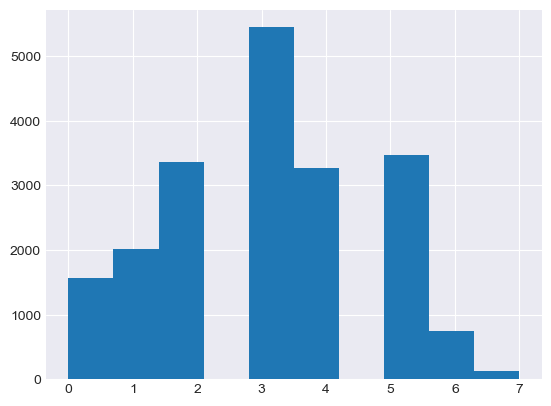

In [38]:
# Plot the distribution of behavior score variable we created 
plt.hist(X_train['behavior_score']);

# Class Imbalance 

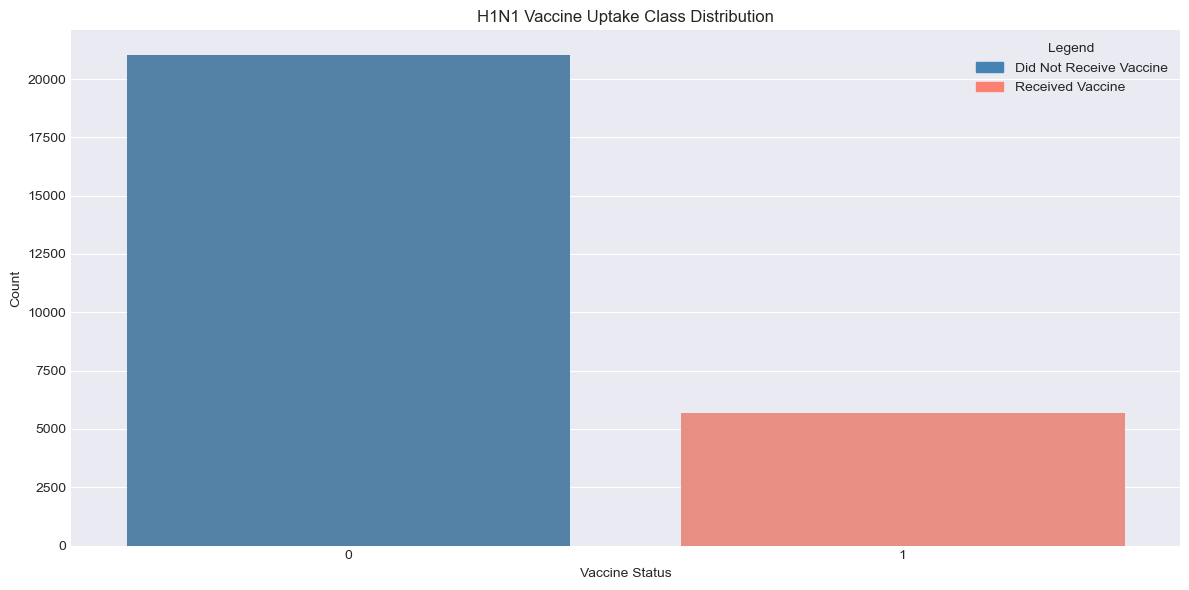

In [39]:
# Checking for class distribution
fig, ax = plt.subplots(figsize=(12, 6))
sns.countplot(x='h1n1_vaccine', data=merged_df, ax=ax, palette=["steelblue", "salmon"])

ax.set_title('H1N1 Vaccine Uptake Class Distribution')
ax.set_xlabel('Vaccine Status')
ax.set_ylabel('Count')

# Add separate legend labels for each class
legend_labels = ['Did Not Receive Vaccine', "Received Vaccine"]
colors = ["steelblue", "salmon"]
legend_handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in colors]
ax.legend(legend_handles, legend_labels, title='Legend')

plt.tight_layout()
plt.savefig('Visualization1')

In [40]:
# Checking class imbalance for h1n1_vaccine [target variable]
y.value_counts()

h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64

Presence of class imbalance

In [41]:
# Address class imbalance [only uses training set]
smote_df = pd.concat([X_train, y_train], axis = 1)

# Instantiate SMOTE class
smote = SMOTE()

# Fit and transform data
X_train_resample, y_train_resample = smote.fit_resample(X_train, y_train)
y_train_resample.value_counts()

h1n1_vaccine
1    15779
0    15779
Name: count, dtype: int64



For seasonal_vaccine it looks good in terms of class disribution

## Exploratory Data Analysis

In [42]:
# X_train.plot(subplots= True, layout= (10, 4));

# Modeling

### Logistic Regression

In [43]:
# Baseline model

# Instantiate classifier
baseline_logreg = LogisticRegression(C= 1e12, random_state=40, solver='liblinear')

# Fit model to train set
baseline_logreg.fit(X_train_resample, y_train_resample)

LogisticRegression(C=1000000000000.0, random_state=40, solver='liblinear')

In [44]:
# Accuracy on training data set
baseline_preds = baseline_logreg.predict(X_train_resample)

print(f"accuracy score: {accuracy_score(y_train_resample, baseline_preds)}")
print(f"f1 score: {f1_score(y_train_resample, baseline_preds)}")
print(f"precision score: {precision_score(y_train_resample, baseline_preds)}")
print(f"recall score: {recall_score(y_train_resample, baseline_preds)}")

accuracy score: 0.763292984346283
f1 score: 0.7560099294486543
precision score: 0.780009435869785
recall score: 0.7334431839787059


In [45]:
# Accuracy on test data set
baseline_preds = baseline_logreg.predict(X_test)

print(f"accuracy score: {accuracy_score(y_test, baseline_preds)}")
print(f"f1 score: {f1_score(y_test, baseline_preds)}")
print(f"precision score: {precision_score(y_test, baseline_preds)}")
print(f"recall score: {recall_score(y_test, baseline_preds)}")

accuracy score: 0.7735509959562678
f1 score: 0.5759955131800336
precision score: 0.47923471768548764
recall score: 0.7217146872803936


In [46]:
# Model2

# Instantiate classifier
logreg_2 = LogisticRegression(penalty = 'l1', C= 1e12, random_state=40, solver='liblinear')

# Fit model to train set
logreg_2.fit(X_train_resample, y_train_resample)

LogisticRegression(C=1000000000000.0, penalty='l1', random_state=40,
                   solver='liblinear')

In [47]:
# Accuracy on training data set
logreg2_preds = logreg_2.predict(X_train_resample)

print(f"accuracy score: {accuracy_score(y_train_resample, logreg2_preds)}")
print(f"f1 score: {f1_score(y_train_resample, logreg2_preds)}")
print(f"precision score: {precision_score(y_train_resample, logreg2_preds)}")
print(f"recall score: {recall_score(y_train_resample, logreg2_preds)}")

accuracy score: 0.7631662336016224
f1 score: 0.7558633305023844
precision score: 0.779912369396697
recall score: 0.7332530578617149


In [48]:
# Accuracy on test data set
logreg2_preds = logreg_2.predict(X_test)

print(f"accuracy score: {accuracy_score(y_test, logreg2_preds)}")
print(f"f1 score: {f1_score(y_test, logreg2_preds)}")
print(f"precision score: {precision_score(y_test, logreg2_preds)}")
print(f"recall score: {recall_score(y_test, logreg2_preds)}")

accuracy score: 0.7735509959562678
f1 score: 0.5759955131800336
precision score: 0.47923471768548764
recall score: 0.7217146872803936


In [111]:
# Model 3

# Instantiate classifier
logreg_3 = LogisticRegression(penalty = 'l2', random_state=40, solver='lbfgs')

# Fit model to train set
logreg_3.fit(X_train_resample, y_train_resample)

/Users/dave/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=40)

In [112]:
# Accuracy on training data set
logreg3_preds = logreg_3.predict(X_train_resample)

print(f"accuracy score: {accuracy_score(y_train_resample, logreg3_preds)}")
print(f"f1 score: {f1_score(y_train_resample, logreg3_preds)}")
print(f"precision score: {precision_score(y_train_resample, logreg3_preds)}")
print(f"recall score: {recall_score(y_train_resample, logreg3_preds)}")

accuracy score: 0.7631345459154573
f1 score: 0.7558386411889596
precision score: 0.779859800485306
recall score: 0.7332530578617149


In [113]:
# Accuracy on test data set
logreg3_preds = logreg_3.predict(X_test)

print(f"accuracy score: {accuracy_score(y_test, logreg3_preds)}")
print(f"f1 score: {f1_score(y_test, logreg3_preds)}")
print(f"precision score: {precision_score(y_test, logreg3_preds)}")
print(f"recall score: {recall_score(y_test, logreg3_preds)}")

accuracy score: 0.7735509959562678
f1 score: 0.5759955131800336
precision score: 0.47923471768548764
recall score: 0.7217146872803936


In [120]:
# ROC curve for the best Logistic regression model
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, logreg_3.predict_proba(X_test)[:,1])

### K-Nearest Neighbours

In [49]:
# Baseline model

# Instantiate classifier
baseline_KNN_clf = KNeighborsClassifier()

# Fit model to train set
baseline_KNN_clf.fit(X_train_resample, y_train_resample)

KNeighborsClassifier()

In [50]:
# Accuracy on training data set
baseline_preds = baseline_KNN_clf.predict(X_train_resample)

print(f"accuracy score: {accuracy_score(y_train_resample, baseline_preds)}")
print(f"f1 score: {f1_score(y_train_resample, baseline_preds)}")
print(f"precision score: {precision_score(y_train_resample, baseline_preds)}")
print(f"recall score: {recall_score(y_train_resample, baseline_preds)}")

accuracy score: 0.8447303377907345
f1 score: 0.8646633154725736
precision score: 0.7662897145934303
recall score: 0.9920147030863806


In [51]:
# Accuracy on test data set
baseline_preds = baseline_KNN_clf.predict(X_test)

print(f"accuracy score: {accuracy_score(y_test, baseline_preds)}")
print(f"f1 score: {f1_score(y_test, baseline_preds)}")
print(f"precision score: {precision_score(y_test, baseline_preds)}")
print(f"recall score: {recall_score(y_test, baseline_preds)}")

accuracy score: 0.621386850381908
f1 score: 0.4614401363442693
precision score: 0.3310914093549373
recall score: 0.7610681658468025


In [52]:
# Find best n_neighbors parameter
n_neighbors_params = []
accuracy_scores = []

for n in np.arange(1, 52, 2):
    n_neighbors_params.append(n)
    
    clf_model = KNeighborsClassifier(n_neighbors = n)
    clf_model.fit(X_train_resample, y_train_resample)
    acc = accuracy_score(y_test, clf_model.predict(X_test))
    accuracy_scores.append(acc)

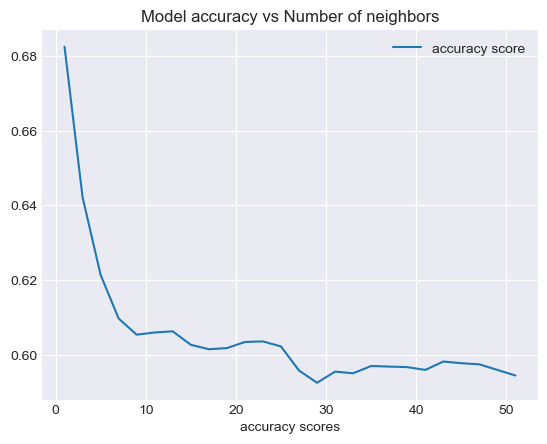

In [53]:
plt.plot(n_neighbors_params, accuracy_scores, label ='accuracy score')
plt.xlabel('n_neighbors params values')
plt.xlabel('accuracy scores')
plt.title('Model accuracy vs Number of neighbors')
plt.legend();

In [54]:
# Scale training and test data sets
scaler = StandardScaler()

X_train_resample_scaled = scaler.fit_transform(X_train_resample)
X_test_scaled = scaler.transform(X_test)

In [55]:
# Model Iteration

# Instantiate classifier
KNN_clf2 = KNeighborsClassifier()

# Fit model to train set
KNN_clf2.fit(X_train_resample_scaled, y_train_resample)

# Accuracy of model on train set
print(f"accuracy score: {accuracy_score(y_train_resample, KNN_clf2.predict(X_train_resample_scaled))}")
print(f"f1 score: {f1_score(y_train_resample, KNN_clf2.predict(X_train_resample_scaled))}")
print(f"precision score: {precision_score(y_train_resample, KNN_clf2.predict(X_train_resample_scaled))}")
print(f"recall score: {recall_score(y_train_resample, KNN_clf2.predict(X_train_resample_scaled))}")

accuracy score: 0.8831041257367387
f1 score: 0.8938814256537123
precision score: 0.8184260429835651
recall score: 0.9846631598960643


In [56]:
# Accuracy of model on test set
print(f"accuracy score: {accuracy_score(y_test, KNN_clf2.predict(X_test_scaled))}")
print(f"f1 score: {f1_score(y_test, KNN_clf2.predict(X_test_scaled))}")
print(f"precision score: {precision_score(y_test, KNN_clf2.predict(X_test_scaled))}")
print(f"recall score: {recall_score(y_test, KNN_clf2.predict(X_test_scaled))}")

accuracy score: 0.6600269582147671
f1 score: 0.43504230960676954
precision score: 0.33680154142581886
recall score: 0.6141953619114546


In [57]:
# Find best n_neighbors parameter
n_neighbors_params = []
accuracy_scores = []

for n in np.arange(1, 52, 2):
    n_neighbors_params.append(n)
    
    clf_model = KNeighborsClassifier(n_neighbors = n)
    clf_model.fit(X_train_resample_scaled, y_train_resample)
    acc = accuracy_score(y_test, clf_model.predict(X_test_scaled))
    accuracy_scores.append(acc)

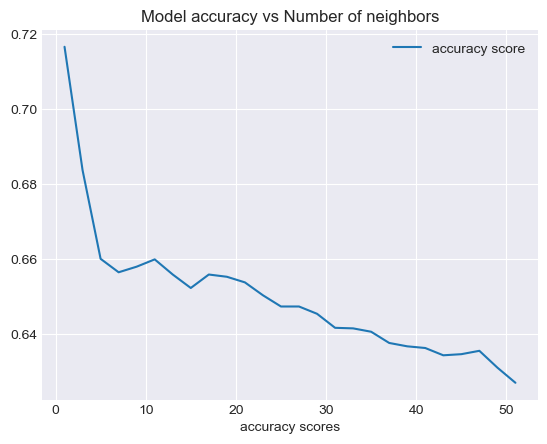

In [58]:
plt.plot(n_neighbors_params, accuracy_scores, label ='accuracy score')
plt.xlabel('n_neighbors params values')
plt.xlabel('accuracy scores')
plt.title('Model accuracy vs Number of neighbors')
plt.legend();

##### Feature selection

In [59]:
# Define a custom function to compute feature importances
def custom_importance_getter_knn(estimator):
    # Extract the distances to the nearest neighbors
    distances, indices = estimator.kneighbors()
    # Compute the mean distance for each feature
    feature_importances = distances.mean(axis=0)
    return feature_importances

# Initialize RFE with the classifier and desired number of features to select
rfe = RFE(estimator= KNN_clf2, n_features_to_select= .8, step= 1, importance_getter= custom_importance_getter_knn)  # Select top 80% features

# Fit RFE on train data set
rfe.fit(X_train_resample_scaled, y_train_resample)

print(X_train_resample.columns)
print(rfe.ranking_)
print(rfe.support_)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_< 12 Years',
       'education_College Graduate', 'education_Some College', 'education_nan',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_nan', 'marital_status_Not Married',
       'marital_status_nan', 'rent_or_own_Rent', 'rent_or_own_nan',
       'employment_status_Not

In [60]:
masked_columns = X_train_resample.columns[rfe.get_support(indices= True)]

In [61]:
X_train_rfe = X_train_resample_scaled[:,0:11]
X_test_rfe = X_test_scaled[:,0:11]

In [62]:
# Instantiate classifier
KNN_clf3 = KNeighborsClassifier()

# Fit model to train set
KNN_clf3.fit(X_train_rfe, y_train_resample)

KNeighborsClassifier()

In [63]:
# Accuracy of model on train set
print(f"accuracy score: {accuracy_score(y_train_resample, KNN_clf3.predict(X_train_rfe))}")
print(f"f1 score: {f1_score(y_train_resample, KNN_clf3.predict(X_train_rfe))}")
print(f"precision score: {precision_score(y_train_resample, KNN_clf3.predict(X_train_rfe))}")
print(f"recall score: {recall_score(y_train_resample, KNN_clf3.predict(X_train_rfe))}")

accuracy score: 0.8222320806134736
f1 score: 0.8031578947368421
precision score: 0.8996934203285906
recall score: 0.7253311363204259


In [64]:
# Accuracy of model on test set
print(f"accuracy score: {accuracy_score(y_test, KNN_clf3.predict(X_test_rfe))}")
print(f"f1 score: {f1_score(y_test, KNN_clf3.predict(X_test_rfe))}")
print(f"precision score: {precision_score(y_test, KNN_clf3.predict(X_test_rfe))}")
print(f"recall score: {recall_score(y_test, KNN_clf3.predict(X_test_rfe))}")

accuracy score: 0.7811891568069492
f1 score: 0.39999999999999997
precision score: 0.48122529644268774
recall score: 0.3422347153900211


In [65]:
# Find best n_neighbors parameter
n_neighbors_params = []
accuracy_scores = []

for n in np.arange(1, 102, 2):
    n_neighbors_params.append(n)
    
    clf_model = KNeighborsClassifier(n_neighbors = n)
    clf_model.fit(X_train_rfe, y_train_resample)
    acc = accuracy_score(y_test, clf_model.predict(X_test_rfe))
    accuracy_scores.append(acc)

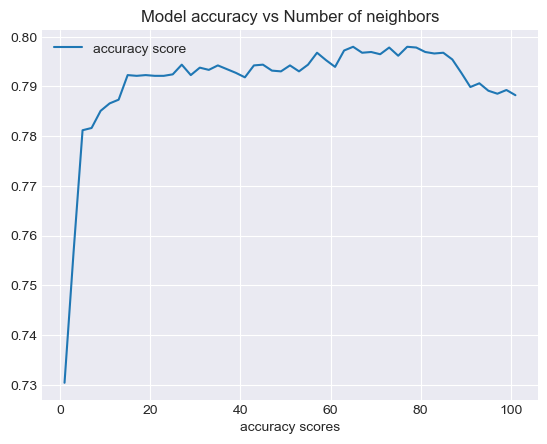

In [66]:
plt.plot(n_neighbors_params, accuracy_scores, label ='accuracy score')
plt.xlabel('n_neighbors params values')
plt.xlabel('accuracy scores')
plt.title('Model accuracy vs Number of neighbors')
plt.legend();

In [67]:
# Best n_neighbors parameter is 51
index = accuracy_scores.index(max(accuracy_scores))
n_neighbors_params[index]

65

In [68]:
# Instantiate classifier
KNN_clf_final = KNeighborsClassifier(n_neighbors = 51)

# Fit model to train set
KNN_clf_final.fit(X_train_rfe, y_train_resample)

KNeighborsClassifier(n_neighbors=51)

In [69]:
# Accuracy of model on train set
print(f"accuracy score on train set: {accuracy_score(y_train_resample, KNN_clf_final.predict(X_train_rfe))}")
print(f"f1 score on train set: {f1_score(y_train_resample, KNN_clf_final.predict(X_train_rfe))}")
print(f"precision score on train set: {precision_score(y_train_resample, KNN_clf_final.predict(X_train_rfe))}")
print(f"recall score on train set: {recall_score(y_train_resample, KNN_clf_final.predict(X_train_rfe))}")
print("\n-------------------------------------------------------------\n")

# Accuracy of model on test set
print(f"accuracy score on test set: {accuracy_score(y_test, KNN_clf_final.predict(X_test_rfe))}")
print(f"f1 score on test set: {f1_score(y_test, KNN_clf_final.predict(X_test_rfe))}")
print(f"precision score on test set: {precision_score(y_test, KNN_clf_final.predict(X_test_rfe))}")
print(f"recall score on test set: {recall_score(y_test, KNN_clf_final.predict(X_test_rfe))}")

accuracy score on train set: 0.7489067748273021
f1 score on train set: 0.710845132097504
precision score on train set: 0.8378494623655914
recall score on train set: 0.6172761264972432

-------------------------------------------------------------

accuracy score on test set: 0.7942189606110529
f1 score on test set: 0.4985401459854015
precision score on test set: 0.5186028853454822
recall score on test set: 0.4799718903724526


##### Cross validation

In [130]:
results = cross_validate(KNeighborsClassifier(n_neighbors = 51), X_train_rfe, y_train_resample,
              scoring = ['f1', 'accuracy', 'precision', 'recall'])

In [131]:
print(f"test f1 score with cross validation: {np.mean(results['test_f1'])}")
print(f"test accuracy with cross validation: {np.mean(results['test_accuracy'])}")
print(f"test precision with cross validation: {np.mean(results['test_precision'])}")
print(f"test recall with cross validation: {np.mean(results['test_recall'])}")

test f1 score with cross validation: 0.3872858577599921
test accuracy with cross validation: 0.6165500306363504
test precision with cross validation: 0.8493507442465515
test recall with cross validation: 0.2580065440215001


In [133]:
# ROC curve for the best KNN model
fpr_knn, tpr_knn, _ = roc_curve(y_test, KNN_clf_final.predict_proba(X_test_rfe)[:,1])

/Users/dave/anaconda3/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


### Naive Bayes

In [72]:
# Instantiate NB classifier
baseline_nbayes_clf = GaussianNB()

# Fit model
baseline_nbayes_clf.fit(X_train_resample_scaled, y_train_resample)

GaussianNB()

In [73]:
# Accuracy in training data
print(f"accuracy score: {accuracy_score(y_train_resample, baseline_nbayes_clf.predict(X_train_resample_scaled))}")
print(f"f1 score: {f1_score(y_train_resample, baseline_nbayes_clf.predict(X_train_resample_scaled))}")
print(f"precision score: {precision_score(y_train_resample, baseline_nbayes_clf.predict(X_train_resample_scaled))}")
print(f"recall score: {recall_score(y_train_resample, baseline_nbayes_clf.predict(X_train_resample_scaled))}")

accuracy score: 0.6902211800494328
f1 score: 0.7092207019631173
precision score: 0.6682360854212208
recall score: 0.7555611889219849


In [74]:
# Accuracy in testing data
print(f"accuracy score: {accuracy_score(y_test, baseline_nbayes_clf.predict(X_test_scaled))}")
print(f"f1 score: {f1_score(y_test, baseline_nbayes_clf.predict(X_test_scaled))}")
print(f"precision score: {precision_score(y_test, baseline_nbayes_clf.predict(X_test_scaled))}")
print(f"recall score: {recall_score(y_test, baseline_nbayes_clf.predict(X_test_scaled))}")

accuracy score: 0.6315710648494833
f1 score: 0.4398907103825137
precision score: 0.3253620747726507
recall score: 0.6788475052705552


#### Feature Selection

In [75]:
def custom_importance_getter_gnb(estimator, X_train, y_train):
    # Fit the Gaussian Naive Bayes estimator
    estimator.fit(X_train, y_train)
    # Compute mutual information between each feature and the target variable
    feature_importances = mutual_info_classif(X_train, y_train)
    return feature_importances

In [76]:
n_bayes_clf = GaussianNB()
custom_importance_getter_gnb(n_bayes_clf, X_train_resample_scaled, y_train_resample)

array([0.11774998, 0.10135958, 0.01178774, 0.0389842 , 0.02587705,
       0.03143207, 0.03422351, 0.03168253, 0.04079353, 0.16019096,
       0.06865763, 0.03100501, 0.05796772, 0.17163414, 0.14849846,
       0.08469324, 0.08199758, 0.05657784, 0.03591886, 0.042603  ,
       0.03779387, 0.0330315 , 0.02415459, 0.05423289, 0.04642951,
       0.00928477, 0.01688165, 0.01728898, 0.04766931, 0.07392898,
       0.04689383, 0.02624133, 0.03352907, 0.05529903, 0.00338435,
       0.05348797, 0.01049163, 0.05008041, 0.01676375, 0.0083934 ,
       0.04124175, 0.01645766, 0.03906187, 0.03241855, 0.02702368,
       0.04532387, 0.02804328, 0.04258733, 0.03917981, 0.06317899,
       0.05970063, 0.10139326])

In [77]:
# Fit the Gaussian Naive Bayes estimator
estimator = GaussianNB()

# Compute feature importances using the custom function
feature_importances = custom_importance_getter_gnb(estimator, X_train_resample_scaled, y_train_resample)

# Get the indices of features sorted by importance
sorted_indices = feature_importances.argsort()[::-1]

# Get feature names
feature_names = X_train_resample.columns

# Get feature names and their rankings
feature_rankings = [[feature_names[i], rank + 1] for rank, i in enumerate(sorted_indices)]

print("Feature rankings:")
pd.DataFrame(feature_rankings, columns=['Feature', 'Rank'])

Feature rankings:


,Feature,Rank
0,opinion_h1n1_vacc_effective,1
1,doctor_recc_h1n1,2
2,opinion_h1n1_risk,3
3,h1n1_concern,4
4,h1n1_knowledge,5
5,behavior_score,6
6,opinion_h1n1_sick_from_vacc,7
7,household_adults,8
8,sex_Male,9
9,chronic_med_condition,10


In [78]:
feature_rankings = pd.DataFrame(feature_rankings, columns=['Feature', 'Rank'])

select_columns = feature_rankings['Feature'][0:10]
X_train_resample[select_columns]

,opinion_h1n1_vacc_effective,doctor_recc_h1n1,opinion_h1n1_risk,h1n1_concern,h1n1_knowledge,behavior_score,opinion_h1n1_sick_from_vacc,household_adults,sex_Male,chronic_med_condition
0,4.000000,0.000000,2.000000,1.000000,1.000000,5.000000,4.000000,1.0,0.000000,1.000000
1,4.000000,1.000000,4.000000,3.000000,1.000000,3.000000,4.000000,0.0,0.000000,0.000000
2,3.000000,0.000000,3.000000,2.000000,1.000000,4.000000,2.000000,2.0,0.000000,0.000000
3,4.000000,0.000000,2.000000,2.000000,1.000000,4.000000,4.000000,1.0,0.000000,0.000000
4,5.000000,0.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.0,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
31553,3.853788,1.000000,4.000000,2.000000,1.853788,1.146212,4.146212,0.0,0.000000,1.000000
31554,3.000000,0.000000,3.132356,3.000000,1.000000,4.132356,5.000000,1.0,0.000000,0.000000
31555,4.000000,0.925404,1.000000,2.925404,1.000000,5.000000,2.000000,1.0,1.000000,0.000000
31556,5.000000,1.000000,4.000000,2.000000,2.000000,4.000000,4.000000,1.0,1.000000,0.909276


In [79]:
X_train_resample_scaled_select_columns = scaler.fit_transform(X_train_resample[select_columns])
X_test_scaled_select_columns = scaler.transform(X_test[select_columns])

In [80]:
n_bayes_clf2 = GaussianNB()

# Fit model
n_bayes_clf2.fit(X_train_resample_scaled_select_columns, y_train_resample)

GaussianNB()

In [81]:
# Accuracy in training data
print(f"accuracy score: {accuracy_score(y_train_resample, n_bayes_clf2.predict(X_train_resample_scaled_select_columns))}")
print(f"f1 score: {f1_score(y_train_resample, n_bayes_clf2.predict(X_train_resample_scaled_select_columns))}")
print(f"precision score: {precision_score(y_train_resample, n_bayes_clf2.predict(X_train_resample_scaled_select_columns))}")
print(f"recall score: {recall_score(y_train_resample, n_bayes_clf2.predict(X_train_resample_scaled_select_columns))}")

accuracy score: 0.7444388110780151
f1 score: 0.7388361775849228
precision score: 0.7553966362071249
recall score: 0.7229862475442044


In [82]:
# Accuracy in testing data
print(f"accuracy score: {accuracy_score(y_test, n_bayes_clf2.predict(X_test_scaled_select_columns))}")
print(f"f1 score: {f1_score(y_test, n_bayes_clf2.predict(X_test_scaled_select_columns))}")
print(f"precision score: {precision_score(y_test, n_bayes_clf2.predict(X_test_scaled_select_columns))}")
print(f"recall score: {recall_score(y_test, n_bayes_clf2.predict(X_test_scaled_select_columns))}")

accuracy score: 0.7528830313014827
f1 score: 0.5554956896551725
precision score: 0.4504150283966798
recall score: 0.724525650035137


##### Cross validate 

In [83]:
results = cross_validate(GaussianNB(), X_train_resample_scaled_select_columns, y_train_resample,
              scoring = ['f1', 'accuracy', 'precision', 'recall'])

In [84]:
print(f"test f1 score with cross validation: {np.mean(results['test_f1'])}")
print(f"test accuracy with cross validation: {np.mean(results['test_accuracy'])}")
print(f"test precision with cross validation: {np.mean(results['test_precision'])}")
print(f"test recall with cross validation: {np.mean(results['test_recall'])}")

test f1 score with cross validation: 0.737957769242237
test accuracy with cross validation: 0.7436150471775698
test precision with cross validation: 0.7546873444123156
test recall with cross validation: 0.7220361186601025


In [135]:
# ROC curve for the best Gausssian Naive Bayes model
fpr_gnbayes, tpr_gnbayes, _ = roc_curve(y_test, n_bayes_clf2.predict_proba(X_test_scaled_select_columns)[:,1])

# Decision Tree

In [85]:
# Initialize Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=40)

# Train the model
dt_classifier.fit(X_train_resample, y_train_resample)

# Make predictions on the testing set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.7322150666466977
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      5254
           1       0.39      0.45      0.42      1423

    accuracy                           0.73      6677
   macro avg       0.62      0.63      0.62      6677
weighted avg       0.75      0.73      0.74      6677

Confusion Matrix:
[[4250 1004]
 [ 784  639]]


In [86]:
# Define the hyperparameters grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the decision tree classifier
dt_classifier = DecisionTreeClassifier(random_state=40)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search
grid_search.fit(X_train_resample, y_train_resample)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.843878277793275


In [87]:
# Initialize the decision tree classifier with best parameters
best_dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4, min_samples_split=2, random_state=40)

# Train the model with best parameters
best_dt_classifier.fit(X_train_resample, y_train_resample)

# Make predictions on the testing set
y_pred_best = best_dt_classifier.predict(X_test)

# Evaluate the model with best parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best parameters:", accuracy_best)

# Classification report
print("Classification Report with best parameters:")
print(classification_report(y_test, y_pred_best))

# Confusion matrix
print("Confusion Matrix with best parameters:")
print(confusion_matrix(y_test, y_pred_best))

Accuracy with best parameters: 0.7814886925265838
Classification Report with best parameters:
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      5254
           1       0.49      0.43      0.46      1423

    accuracy                           0.78      6677
   macro avg       0.67      0.65      0.66      6677
weighted avg       0.77      0.78      0.78      6677

Confusion Matrix with best parameters:
[[4605  649]
 [ 810  613]]


##### Feature selection

In [88]:
# Initialize RFE with the classifier and desired number of features to select
rfe = RFE(estimator= best_dt_classifier, n_features_to_select= .8, step= 1)  # Select top 80% features

# Fit RFE on train data set
rfe.fit(X_train_resample, y_train_resample)
print(X_train_resample.columns)
print(rfe.ranking_)
print(rfe.support_)

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds',
       'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'child_under_6_months', 'health_worker', 'opinion_h1n1_vacc_effective',
       'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'household_adults',
       'household_children', 'age_group_35 - 44 Years',
       'age_group_45 - 54 Years', 'age_group_55 - 64 Years',
       'age_group_65+ Years', 'education_< 12 Years',
       'education_College Graduate', 'education_Some College', 'education_nan',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'income_poverty_> $75,000', 'income_poverty_Below Poverty',
       'income_poverty_nan', 'marital_status_Not Married',
       'marital_status_nan', 'rent_or_own_Rent', 'rent_or_own_nan',
       'employment_status_Not

In [89]:
masked_columns = X_train_resample.columns[rfe.get_support(indices= True)]
masked_columns

Index(['h1n1_concern', 'h1n1_knowledge', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'chronic_med_condition',
       'health_worker', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'household_adults', 'household_children',
       'age_group_35 - 44 Years', 'age_group_45 - 54 Years',
       'age_group_55 - 64 Years', 'age_group_65+ Years',
       'education_< 12 Years', 'education_College Graduate',
       'education_Some College', 'race_White', 'sex_Male',
       'income_poverty_> $75,000', 'income_poverty_nan',
       'marital_status_Not Married', 'rent_or_own_Rent',
       'employment_status_Not in Labor Force', 'hhs_geo_region_bhuqouqj',
       'hhs_geo_region_fpwskwrf', 'hhs_geo_region_kbazzjca',
       'hhs_geo_region_lrircsnp', 'hhs_geo_region_lzgpxyit',
       'hhs_geo_region_mlyzmhmf',

In [90]:
select_colums = []
for column in X_train_resample.columns:
    if column not in masked_columns:
        select_colums.append(column)
        
select_colums

['behavioral_antiviral_meds',
 'child_under_6_months',
 'education_nan',
 'race_Hispanic',
 'race_Other or Multiple',
 'income_poverty_Below Poverty',
 'marital_status_nan',
 'rent_or_own_nan',
 'employment_status_Unemployed',
 'employment_status_nan',
 'hhs_geo_region_dqpwygqj']

In [91]:
X_train_rfe = X_train_resample[select_colums]
X_test_rfe = X_test[select_colums]

In [138]:
# Initialize the decision tree classifier with best parameters
best_dt_classifier_with_rfe = DecisionTreeClassifier(criterion='entropy', max_depth=20, min_samples_leaf=4, min_samples_split=2, random_state=40)

# Train the model with best parameters
best_dt_classifier_with_rfe.fit(X_train_rfe, y_train_resample)

# Make predictions on the testing set
y_pred_best = best_dt_classifier_with_rfe.predict(X_test_rfe)

# Evaluate the model with best parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Accuracy with best parameters:", accuracy_best)

# Classification report
print("Classification Report with best parameters:")
print(classification_report(y_test, y_pred_best))

# Confusion matrix
print("Confusion Matrix with best parameters:")
print(confusion_matrix(y_test, y_pred_best))

Accuracy with best parameters: 0.7865807997603714
Classification Report with best parameters:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88      5254
           1       0.25      0.00      0.00      1423

    accuracy                           0.79      6677
   macro avg       0.52      0.50      0.44      6677
weighted avg       0.67      0.79      0.69      6677

Confusion Matrix with best parameters:
[[5251    3]
 [1422    1]]


In [139]:
# ROC curve for the best Decision tree model
fpr_dtree, tpr_dtree, _ = roc_curve(y_test, best_dt_classifier_with_rfe.predict_proba(X_test_rfe)[:,1])

# Random Forest

In [141]:
def create_models(seed=42):
    models =[]
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    return models
models= create_models()

In [142]:
# results using default parameters
results= []
names=[]
scoring = 'accuracy'
for name, model in models:
    # fit model with training data
    model.fit(X_train_resample, y_train_resample).predict(X_test)
    # make predictions with testing data
    predictions=model.predict(X_test)
    # calculating accuracy
    accuracy = accuracy_score(y_test, predictions)
    # append model name and accuracy to the lists
    results.append(accuracy)
    names.append(name)
    #print classifier accuracy
    print('classifier:{}, Accuracy score: {})'.format(name, accuracy))
    print(classification_report(y_test, predictions))

classifier:random_forest, Accuracy score: 0.8337576756028157)
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      5254
           1       0.66      0.45      0.54      1423

    accuracy                           0.83      6677
   macro avg       0.76      0.70      0.72      6677
weighted avg       0.82      0.83      0.82      6677



In [145]:
def perform_grid_search(classifer, param_grid):
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', RandomForestClassifier())
    ])

    random_search = GridSearchCV(estimator = pipe,
                       param_grid = param_grid,
                       scoring = 'accuracy',
                       cv = 3,
                       verbose =1)
    random_search.fit(X_train_resample, y_train_resample)

    best_params = random_search.best_params_
    print("Best Parameters:",  best_params)

    # Evaluate the model on the test set
    y_pred = random_search.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)



    print("Test Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 score:", f1)

    # classifiaction reports
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    return best_params, accuracy

In [146]:
classifier = RandomForestClassifier()
param_grid = [{'classifier__max_depth': [5,10],
        'classifier__min_samples_split': [4,6]}]
perform_grid_search(classifier, param_grid)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters: {'classifier__max_depth': 10, 'classifier__min_samples_split': 4}
Test Accuracy: 0.8288153362288453
Precision: 0.6002865329512894
Recall: 0.5888966971187631
F1 score: 0.5945370698829371
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      5254
           1       0.60      0.59      0.59      1423

    accuracy                           0.83      6677
   macro avg       0.74      0.74      0.74      6677
weighted avg       0.83      0.83      0.83      6677



({'classifier__max_depth': 10, 'classifier__min_samples_split': 4},
 0.8288153362288453)

In [147]:
# Final random forest model
# Instantiate classifier
random_forest_final = RandomForestClassifier(max_depth= 10, min_samples_split= 4)

# Fit model
random_forest_final.fit(X_train_resample, y_train_resample)

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [153]:
# ROC curve for the best Decision tree model
fpr_rforest, tpr_rforest, _ = roc_curve(y_test, random_forest_final.predict_proba(X_test)[:,1])

# XGBoost

In [97]:
# Clean feature names
clean_feature_names = [name.replace('[', '').replace(']', '').replace('<', '') for name in X_train_resample.columns]
X_train_resample.columns = clean_feature_names

X_test.columns = [name.replace('education_< ', 'education_ ') for name in X_test.columns]

# Initialize the XGBoost model
xgboost = XGBClassifier()

# Train the XGBoost model
xgboost.fit(X_train_resample, y_train_resample)

# Make predictions on the training set
y_train_pred = xgboost.predict(X_train_resample)

# Calculate evaluation metrics for training set
train_accuracy = accuracy_score(y_train_resample, y_train_pred)
train_precision = precision_score(y_train_resample, y_train_pred)
train_recall = recall_score(y_train_resample, y_train_pred)
train_f1_score = f1_score(y_train_resample, y_train_pred)

# Make predictions on the test set
y_test_pred = xgboost.predict(X_test)

print("confusion_matrix for XGBoost\n",confusion_matrix(y_test,y_test_pred))


print(classification_report(y_test, y_test_pred))


print("Test Accuracy Score:", accuracy_score(y_test, y_test_pred))

confusion_matrix for XGBoost
 [[4905  349]
 [ 739  684]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      5254
           1       0.66      0.48      0.56      1423

    accuracy                           0.84      6677
   macro avg       0.77      0.71      0.73      6677
weighted avg       0.82      0.84      0.83      6677

Test Accuracy Score: 0.8370525685187958


In [98]:
# Define the hyperparameters to tune

param_grid = {
    'max_depth': [ 5, 7, 9],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 300],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_clf = GridSearchCV(xgboost, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train_resample, y_train_resample)

best_parameters = grid_clf.best_params_

print('Grid Search found the following optimal parameters: ')
for param_name in sorted(best_parameters.keys()):
    print('%s: %r' % (param_name, best_parameters[param_name]))

training_preds = grid_clf.predict(X_train_resample)
test_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train_resample, training_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print('')
print('Training Accuracy: {:.4}%'.format(training_accuracy * 100))
print('Validation accuracy: {:.4}%'.format(test_accuracy * 100))

Grid Search found the following optimal parameters: 
colsample_bytree: 0.8
learning_rate: 0.01
max_depth: 9
n_estimators: 300
subsample: 0.8

Training Accuracy: 90.97%
Validation accuracy: 84.05%


In [150]:
# Final XGBoost Model
# Instantiate Classifer
xgboost_final = XGBClassifier(colsample_bytree= 0.8, learning_rate= 0.01, max_depth= 9, n_estimators= 300, subsample= 0.8)

# Fit model
xgboost_final.fit(X_train_resample, y_train_resample)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [151]:
# ROC curve for the best Decision tree model
fpr_xgboost, tpr_xgboost, _ = roc_curve(y_test, xgboost_final.predict_proba(X_test)[:,1])

# ROC Curve

##### Summary of all the tuned models using an ROC curve:
1. Logistic Regression - 
2. Decision Tree - 
3. KNN -  -
4. Naive Bayes -
5. Random Forest - 
6. XGBoost - 


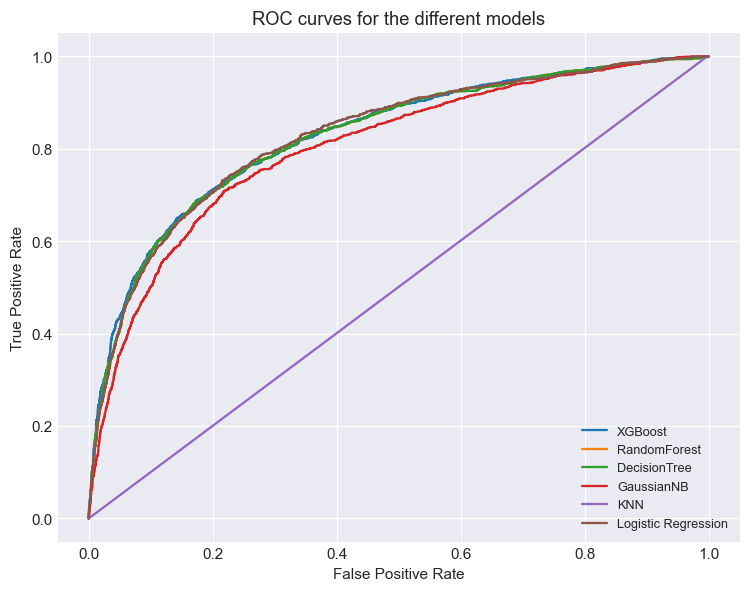

In [202]:
plt.figure(figsize=(8,6), dpi=110)
plt.plot(fpr_xgboost, tpr_xgboost, label='XGBoost')
plt.plot(fpr_rforest, tpr_rforest, label='RandomForest')
plt.plot(fpr_dtree, tpr_dtree, label='DecisionTree')
plt.plot(fpr_gnbayes, tpr_gnbayes, label='GaussianNB')
plt.plot(fpr_knn, tpr_knn, label='KNN')
plt.plot(fpr_logreg, tpr_logreg, label='Logistic Regression')
plt.title('ROC curves for the different models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(fontsize= 'small', loc='lower right')
plt.show()

### The best model for predicting vaccine uptake:

# Conclusions
##### Features that were most important in predicting whether someone was vaccinated or not included:
1. Opinion on H1N1 vaccine effectiveness.
2. Doctor’s recommendation.
3. H1N1 concern.
4. Gender.
5. H1N1 Knowledge.
6. Perceived side-effects from H1N1 vaccine.
7. Chronic medical condition.
8. Number of adults in an household.
   

In [99]:
# Define a function to generate the plots for the important features

def create_vaccination_rate_plot(feature, target, data, x_label, y_label, plot_title, 
                                 x_tick_labels=None, plot_width=7, plot_height=5):
    mean_vaccination_rate = data.groupby(feature)[target].mean().reset_index()

    # Define a list of colors to assign to each category
    colors = ['red', 'green', 'blue', 'orange', 'purple', 'black']

    fig, ax = plt.subplots(figsize=(plot_width, plot_height))
    ax.bar(mean_vaccination_rate[feature], mean_vaccination_rate[target], 
           color=colors[:len(mean_vaccination_rate[feature])])
    
    ax.set_title(plot_title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    if x_tick_labels:
        ax.set_xticks(mean_vaccination_rate[feature])
        ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')
    
    plt.show()

### Plot of the top 5 most important features in predicitin vactination status of H1N1

##### 1.  Respondent's opinion about seasonal flu vaccine effectiveness.

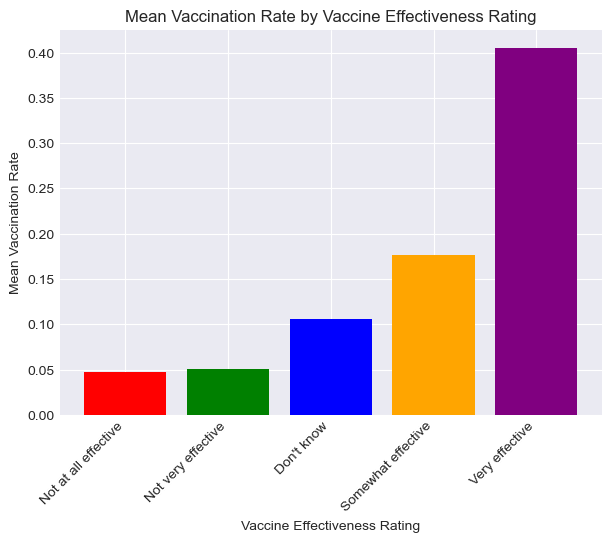

In [100]:
fig = create_vaccination_rate_plot('opinion_h1n1_vacc_effective', 'h1n1_vaccine', merged_df, 
                                   'Vaccine Effectiveness Rating', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Vaccine Effectiveness Rating',
                                    x_tick_labels=['Not at all effective', 'Not very effective', "Don't know", 
                                                   'Somewhat effective', 'Very effective'],
                                    plot_width=7, plot_height=5)

plt.show()

##### 2. Doctor’s recommendation.

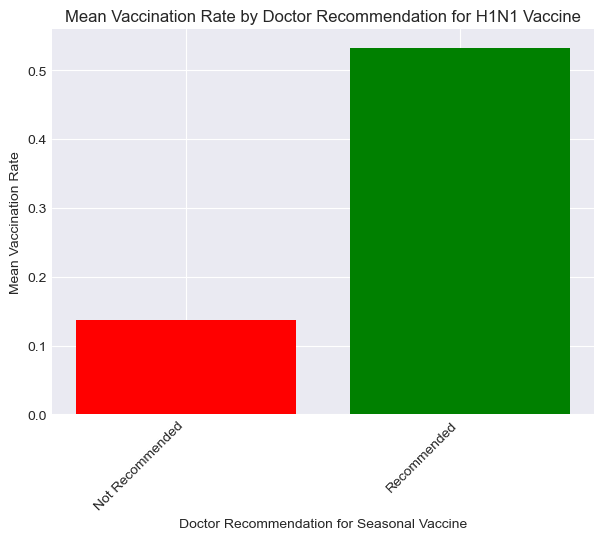

In [101]:
fig = create_vaccination_rate_plot('doctor_recc_h1n1', 'h1n1_vaccine', merged_df, 
                                   'Doctor Recommendation for Seasonal Vaccine', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Doctor Recommendation for H1N1 Vaccine',
                                    x_tick_labels=['Not Recommended', 'Recommended'],
                                    plot_width=7, plot_height=5)

plt.show()

##### 3. H1N1 concern

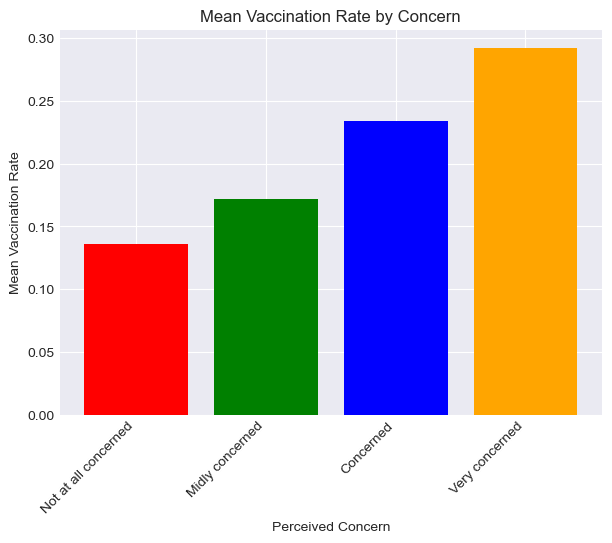

In [102]:
fig = create_vaccination_rate_plot('h1n1_concern', 'h1n1_vaccine', merged_df, 
                                   'Perceived Concern', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Concern',
                                    x_tick_labels=['Not at all concerned', 'Midly concerned',"Concerned", 
                                                   'Very concerned'],
                                    plot_width=7, plot_height=5)

plt.show()

##### 4. Gender

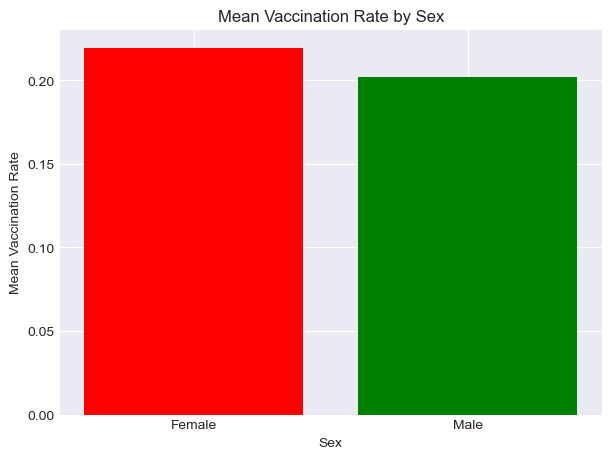

In [103]:
fig = create_vaccination_rate_plot('sex', 'h1n1_vaccine', merged_df, 
                                   'Sex', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by Sex',
                                    x_tick_labels=[],
                                    plot_width=7, plot_height=5)

plt.show()

##### 5. Perceived side effects from H1N1 vaccine

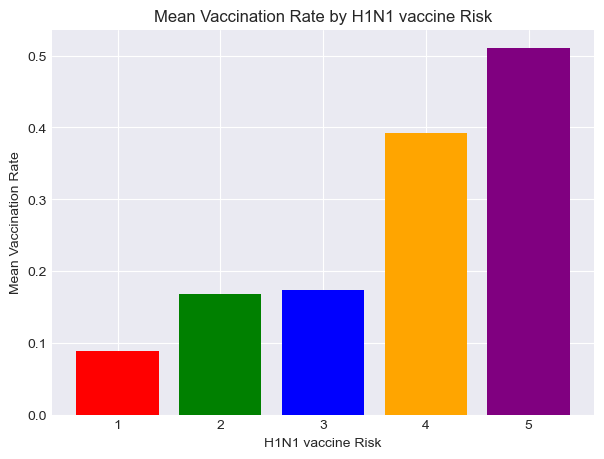

In [104]:
fig = create_vaccination_rate_plot('opinion_h1n1_risk', 'h1n1_vaccine', merged_df, 
                                   'H1N1 vaccine Risk', 
                                   'Mean Vaccination Rate', 
                                   'Mean Vaccination Rate by H1N1 vaccine Risk',
                                    x_tick_labels=[],
                                    plot_width=7, plot_height=5)

plt.show()

# Recommendations


1. Dispel vaccine myths and promote preventative measures against the flu.
2. Identify high risk groups partcularly those with lower levels of education and indviduals expressing low concern for H1N1, to implement targeted messaging to them.
3. Utilize predictive model for efficent resource allocation on the vaccination campaign.
4. Implement policies that emphasize on face masks, minimizing gatherings and hand washing.
5. Collaboration with health experts to encouraage medical checkups and doctor's recommendation. tion
 

# Next Steps

1. Monitoring and Assessment: Keep a close eye on the results of the interventions and communication tactics used. Compare the vaccination uptake rates before and after the interventions to assess the efficacy of various strategies.


2. Update the predictive model often with fresh information to enhance future interventions and targeting tactics.